# Price Per Gallon: Visualization
In this notebook we will be looking at the price per gallon of fuel and seeing how it compares with several of the variables in our data set. 

In [1]:
# Import the important modules
import matplotlib.pyplot as plt
import pandas as pd
print(f'Pandas version: {pd.__version__}')

# Register Pandas data converters for matplotlib
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Pandas version: 0.25.3


In [10]:
# load the data
db = pd.read_pickle('../data/data_formatted.pkl')

## Investigate the data
Let's load the database that we generated previously and checkout what's inside of it.

In [11]:
db.describe()

,Miles,Gas Pumped,Price/Gal,Car MPG,Avg Spd,Car gas,Price/Barrel,Real MPG,paid ($),Latitude,Longitude
count,111.000000,116.000000,116.000000,116.000000,115.000000,116.000000,116.000000,110.000000,110.000000,116.000000,116.000000
mean,472.171171,13.783509,2.459517,36.027586,49.837391,13.788793,60.491466,34.343764,33.854419,41.702264,-93.617169
std,37.997637,0.483713,0.522121,3.423311,5.380349,4.102084,23.217503,2.612735,7.015194,0.174340,0.053450
min,383.000000,11.387000,1.549000,28.200000,34.500000,11.700000,29.440000,27.720000,21.549688,41.586835,-93.631913
25%,448.250000,13.499000,2.096500,33.800000,46.900000,12.700000,44.572500,32.464250,28.821185,41.586835,-93.624959
50%,473.800000,13.753500,2.299000,36.050000,49.400000,13.200000,50.870000,34.368500,31.979938,41.586835,-93.624959
75%,505.200000,14.092500,2.909000,38.925000,51.800000,13.600000,79.240000,36.410000,40.118558,41.731788,-93.624959
max,540.800000,14.862000,3.499000,41.800000,68.600000,41.100000,107.260000,39.665000,49.725347,42.030781,-93.057353


In [12]:
db.dtypes

Date            datetime64[ns]
Miles                  float64
Gas Pumped             float64
Price/Gal              float64
Car MPG                float64
Avg Spd                float64
Car gas                float64
Price/Barrel           float64
Real MPG               float64
paid ($)               float64
Latitude               float64
Longitude              float64
notes                   object
dtype: object

So it looks like we have about 116 entries, with a few missing in the 'Miles', 'Real MPG', 'Avg Spd', and 'paid ($)' columns. What we want is to get an idea of which variables will be the most correlated with the price that we paid.

## Using Seaborn
Let's use the seaborn plotting packages to visualize some of the relationships between the variables.

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


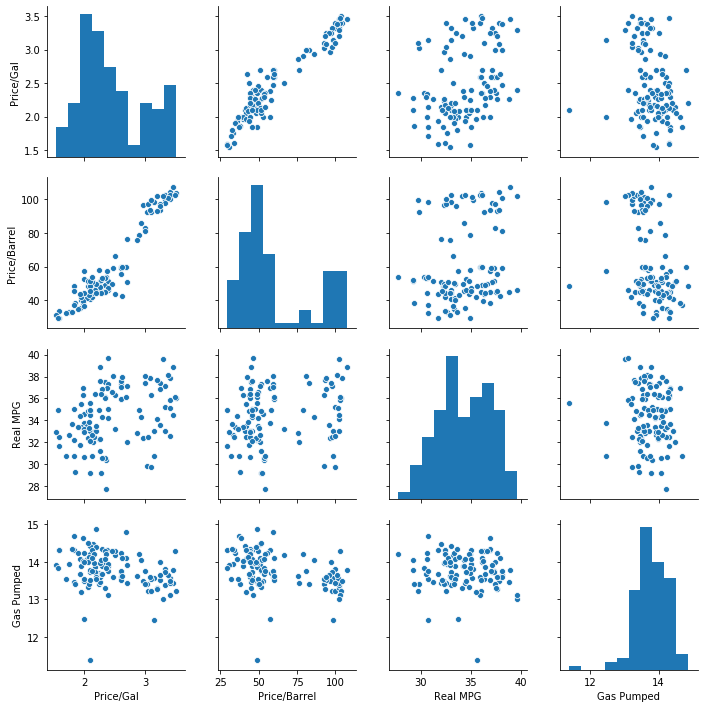

In [13]:
import seaborn as sns
#db_clean = db.dropna(subset=['Price/Gal','Price/Barrel','Real MPG', 'Gas Pumped'])
g = sns.pairplot(db[['Price/Gal','Price/Barrel','Real MPG', 'Gas Pumped']], dropna=True)

Interesting, it looks like the price per gallon of fuel tracks pretty well with the market price per gallon of fuel. We can use this as a fairly strong predictor:

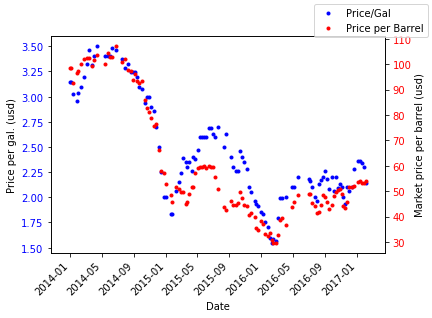

In [14]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Price per gal. (usd)')
plt.xticks(rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')
# Plot 'Price/Gal'
ax1.scatter(db.Date, db['Price/Gal'], color='blue', marker='.', label='Price/Gal')
ax2 = ax1.twinx()
ax2.set_ylabel('Market price per barrel (usd)')
ax2.scatter(db.Date, db['Price/Barrel'], color='red', marker='.', label='Price per Barrel')
ax2.tick_params(axis='y', labelcolor='red')
fig.legend()

So the general trends are the same, but what we don't know is whether there is a strict correlation between the two values. In otherwords, we want to know if there's a definitive formula of the form:

\
    (price/gallon) = $\alpha$ * (price/barrel)
\

## Changing fuel prices over time
The following plot shows how the price I paid for fuel changed over the course of 3 years

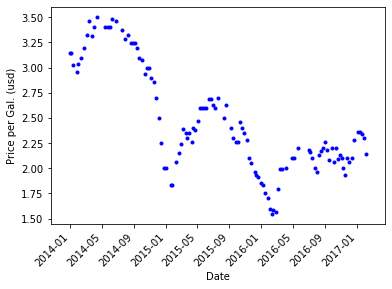

In [15]:
# Plot the price of fuel over time
plt.xlabel('Date')
plt.ylabel('Price per Gal. (usd)')
plt.xticks(rotation=45, ha='right')
plt.scatter(db.Date, db['Price/Gal'], color='blue', marker='.')

You might notice that there was a huge drop in the cost of fuel in the summer of 2014. You can do your own research on why this happened. 

In the mean time, let's look at the correlations between the price of fuel and various measures of the time:
* Month
* Week of year
* Day of year

In [56]:
# Create a new database with columns for Month, Week, and Day
db_time = db.dropna(subset=['Price/Gal','Date'])
db_time['Month'] = [d.month      for d in db_time.Date]
db_time['Week']  = [d.weekofyear for d in db_time.Date]
db_time['Day']   = [d.dayofyear  for d in db_time.Date]
db_time['Year']  = [d.year       for d in db_time.Date]

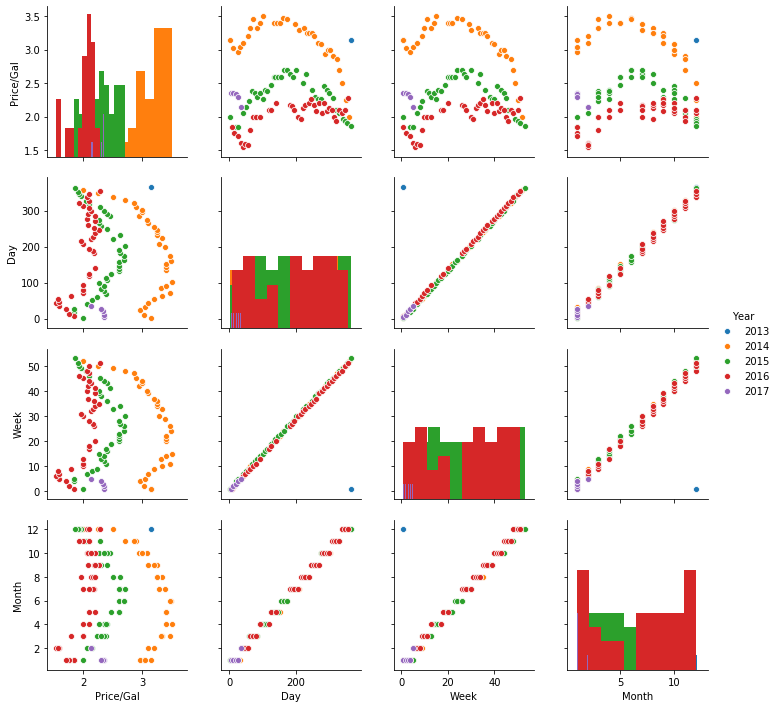

In [58]:
# Plot the time correlations
g = sns.pairplot(db_time, vars=['Price/Gal','Day','Week','Month'], 
                 diag_kind='hist', hue="Year", dropna=True)

Once again, the values appear to correlate with time over the course of a single year. There appear to be year-to-year differences in the amplitude of that correlation, but overall it looks fairly good. So I think we will use 'Week', just because it corresponds with roughly how often I was fueling up.

Now, we can go to the notebook and see what we have there.